Team 8 - Supervised Learning (Logistic Regression Report)
1. Problem Statement
2. Simple Data Dictionary of training models (columns involved in training), incl source of dataset
3. No of records and columns in dataset
4. No of records and columns in the training/test dataset
5. Duration of training for each model
6. How data/feature/model engineering was performed to achive a better outcome
7. Conclusion
8. What you have learnt

In [108]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [109]:
#Read CSV File for processing
df = pd.read_csv(r'C:\Users\Mew\Desktop\Untitled Folder\bank-full.csv').dropna()
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [110]:
#poutcome and contact are mostly unknown, hence we drop these columns
#Will consider dropping default column due to lack of yes/no values

df = df.drop([8,15])

In [111]:
#Reserved for doing categorisation of data

dict = {
    'no': 0,
    'yes': 1
}

dict_edu = {
    'primary': 1,
    'secondary':2,
    'tertiary':3,
}

dict_married = {
    'single': 1,
    'married': 2,
    'divorced': 3,
}

dict_month = {
    'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12
}

dict_job = {
    'admin.': 1,
    'unemployed': 2,
    'management': 3,
    'housemaid': 4,
    'entrepreneur':5,
    "student": 6,
    "blue-collar": 7,
    "self-employed": 8,
    "retired": 9,
    "technician":10,
    "services":11
}


df['y'] = df['y'].map(dict)
df['default'] = df['default'].map(dict)
df['housing'] = df['housing'].map(dict)
df['loan'] = df['loan'].map(dict)

df['marital'] = df['marital'].map(dict_married)

df['education'] = df['education'].map(dict_edu)

df['month'] = df['month'].map(dict_month)

df['job'] = df['job'].map(dict_job)

#drop NaN columns
df = df.dropna()
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,3.0,2,3.0,0,2143,1,0,unknown,5,5,261,1,-1,0,unknown,0
1,44,10.0,1,2.0,0,29,1,0,unknown,5,5,151,1,-1,0,unknown,0
2,33,5.0,2,2.0,0,2,1,1,unknown,5,5,76,1,-1,0,unknown,0
5,35,3.0,2,3.0,0,231,1,0,unknown,5,5,139,1,-1,0,unknown,0
6,28,3.0,1,3.0,0,447,1,1,unknown,5,5,217,1,-1,0,unknown,0


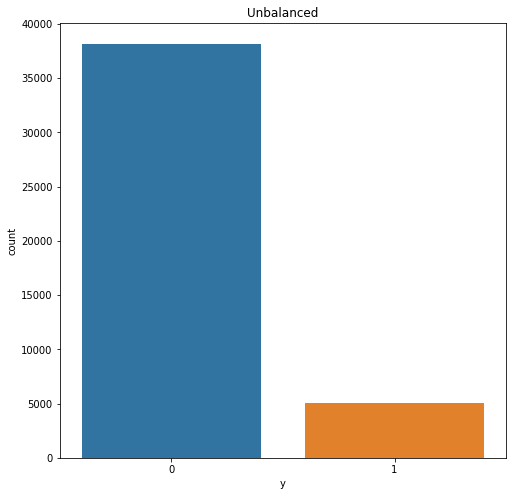

In [112]:
plt.figure(figsize=(8, 8))

sns.countplot('y', data=df)

plt.title('Unbalanced')

plt.show()

In [113]:
# Shuffle the Dataset.
shuffled_df = df.sample(frac=1,random_state=4)

# Put all the yes class in a separate dataset.
yes_df = shuffled_df.loc[shuffled_df['y'] == 1]

#Randomly select ? observations from the no (majority class)
#n = (df.y == 1).count()
#print(n)
no_df = shuffled_df.loc[shuffled_df['y'] == 0].sample(n = 4900,random_state=42)

# Concatenate both dataframes again
normalized_df = pd.concat([yes_df, no_df])

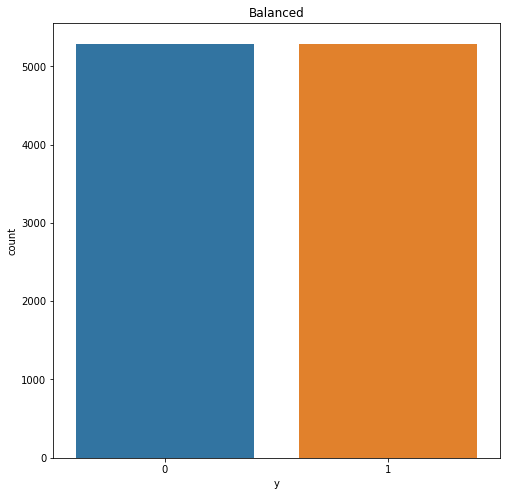

In [114]:
plt.figure(figsize=(8, 8))

sns.countplot('y', data=normalizeddf)

plt.title('Balanced')

plt.show()

In [115]:
df.corr()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
age,1.000000,0.047996,0.403289,-0.167006,-0.016238,0.097630,-0.185217,-0.010002,-0.008373,0.094142,-0.004931,0.004084,-0.023224,0.001114,0.024783
job,0.047996,1.000000,0.017330,-0.228577,0.002020,-0.034328,0.031752,0.026686,0.005535,-0.013031,0.011405,0.010514,-0.007818,-0.015988,-0.025923
marital,0.403289,0.017330,1.000000,-0.122237,0.006893,-0.002053,0.013101,0.046944,0.005049,0.049611,-0.013026,0.007879,-0.020089,-0.014964,-0.045744
education,-0.167006,-0.228577,-0.122237,1.000000,-0.012023,0.069406,-0.080392,-0.028330,0.025855,0.073301,0.002464,0.004155,0.003650,0.024919,0.070896
default,-0.016238,0.002020,0.006893,-0.012023,1.000000,-0.066461,-0.009026,0.076022,0.008815,0.015961,-0.011042,0.016438,-0.029724,-0.017894,-0.023246
balance,0.097630,-0.034328,-0.002053,0.069406,-0.066461,1.000000,-0.067022,-0.084387,0.004095,0.094130,0.020047,-0.016261,0.003920,0.016559,0.051380
housing,-0.185217,0.031752,0.013101,-0.080392,-0.009026,-0.067022,1.000000,0.037023,-0.029774,-0.175578,0.004026,-0.025531,0.124782,0.036813,-0.138288
loan,-0.010002,0.026686,0.046944,-0.028330,0.076022,-0.084387,0.037023,1.000000,0.010931,0.020058,-0.013235,0.010436,-0.024378,-0.011372,-0.068810
day,-0.008373,0.005535,0.005049,0.025855,0.008815,0.004095,-0.029774,0.010931,1.000000,0.105935,-0.030089,0.164955,-0.094372,-0.052070,-0.030270
month,0.094142,-0.013031,0.049611,0.073301,0.015961,0.094130,-0.175578,0.020058,0.105935,1.000000,-0.013344,0.055801,-0.111220,-0.037156,0.016880


In [116]:
from sklearn.model_selection import train_test_split

x = normalized_df[['housing', 'loan',]]
y = normalized_df['y']

x.head()

,housing,loan
39508,1,0
43685,0,0
33928,1,0
42810,0,0
44098,0,0


In [117]:
#Training model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42)

x_train.head()

,housing,loan
39968,0,0
22909,0,0
6653,1,0
33770,0,0
20736,1,1


In [119]:
logReg = LogisticRegression(solver = 'lbfgs', multi_class = 'multinomial', random_state = 42)
logReg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [120]:
y_pred = logReg.predict(x_test)

In [121]:
print(y_pred)

[0 0 0 ... 1 1 0]


In [122]:
#Check if results are accurate
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

0.6126561870213624


In [123]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test, y_pred)
print(cm)

[[782 415]
 [546 738]]


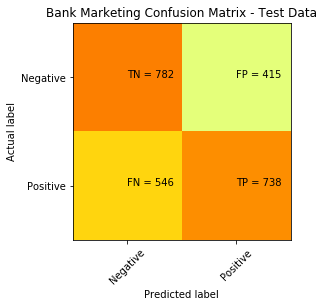

In [125]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Bank Marketing Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()